# 🚦 Smart Traffic Control System
Detect cars and big vehicles using YOLOv5 and decide traffic signal timings accordingly.


In [11]:
# 📷 Read Multiple Images (One per Lane)
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Replace video paths with image paths
image_paths = ['lane1.jpg', 'lane2.jpg', 'lane3.jpg','lane4.jpg']  # Add more if needed

# Define count function
def count_vehicles(frame):
    results = model(frame)
    detections = results.xyxy[0]  # [x1, y1, x2, y2, conf, class]
    
    car_count = 0
    big_vehicle_count = 0

    for det in detections:
        class_id = int(det[5])
        class_name = model.names[class_id]
        conf = float(det[4])

        if conf < 0.4:
            continue

        if class_name in ['car']:
            car_count += 1
        elif class_name in ['bus', 'truck']:
            big_vehicle_count += 1

    return car_count, big_vehicle_count, results


# Process each image
import pandas as pd

lane_durations = []
for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (1280, 720))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    cars, bigs, results = count_vehicles(img_rgb)
    duration = calculate_duration(cars, bigs)

    # Store result
    lane_durations.append({
        'Lane': i + 1,
        'Cars': cars,
        'Bigs': bigs,
        'Duration': duration
    })

    # Display
    annotated = results.render()[0]
    plt.imshow(annotated)
    plt.title(f"Lane {i+1}: Cars={cars}, Bigs={bigs}, Duration={duration}s")
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)

# Export to CSV for Streamlit app
df = pd.DataFrame(lane_durations)
df.to_csv("signal_output.csv", index=False)
df


,Lane,Cars,Bigs,Duration
0,1,23,6,80
1,2,15,1,44
2,3,13,2,44
3,4,12,2,42


In [1]:
# 🧠 Load YOLOv5 Model
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)
model.conf = 0.4
big_vehicles = ['truck', 'bus']
car_classes = ['car']

Using cache found in C:\Users\piyus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-6-21 Python-3.13.2 torch-2.7.1+cpu CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


In [14]:
# 🎬 Read Multiple Video Feeds (One per Lane)
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

video_paths = ['lane1.mp4', 'lane2.mp4']
caps = [cv2.VideoCapture(path) for path in video_paths]

def count_vehicles(frame):
    results = model(frame)
    labels = results.xyxyn[0][:, -1]
    car_count = 0
    big_vehicle_count = 0
    for label in labels:
        class_name = model.names[int(label)]
        if class_name in car_classes:
            car_count += 1
        elif class_name in big_vehicles:
            big_vehicle_count += 1
    return car_count, big_vehicle_count, results

In [10]:
# 🔁 Signal Timing Logic
def calculate_duration(cars, bigs):
    base_time = 10
    car_weight = 2
    big_weight = 4
    duration = base_time + cars * car_weight + bigs * big_weight
    return min(duration, 80)

In [16]:
# 🔄 Process Video & Export Results
import pandas as pd

lane_durations = []
for i, cap in enumerate(caps):
    ret, frame = cap.read()
    if not ret:
        continue
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cars, bigs, results = count_vehicles(frame)
    duration = calculate_duration(cars, bigs)
    lane_durations.append({'Lane': i+1, 'Cars': cars, 'Bigs': bigs, 'Duration': duration})
    
    annotated = results.render()[0]
    plt.imshow(annotated)
    plt.title(f"Lane {i+1}: Cars={cars}, Bigs={bigs}, Signal={duration}s")
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)

for cap in caps:
    cap.release()

df = pd.DataFrame(lane_durations)
df.to_csv('signal_output.csv', index=False)
df

,Lane,Cars,Bigs,Duration
0,1,14,0,24
1,2,10,0,20


Using cache found in C:\Users\piyus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-6-21 Python-3.13.2 torch-2.7.1+cpu CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 
C:\Users\piyus/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 3 persons, 2 ties
Speed: 3436.9ms pre-process, 1353.6ms inference, 2.1ms NMS per image at shape (1, 3, 384, 640)


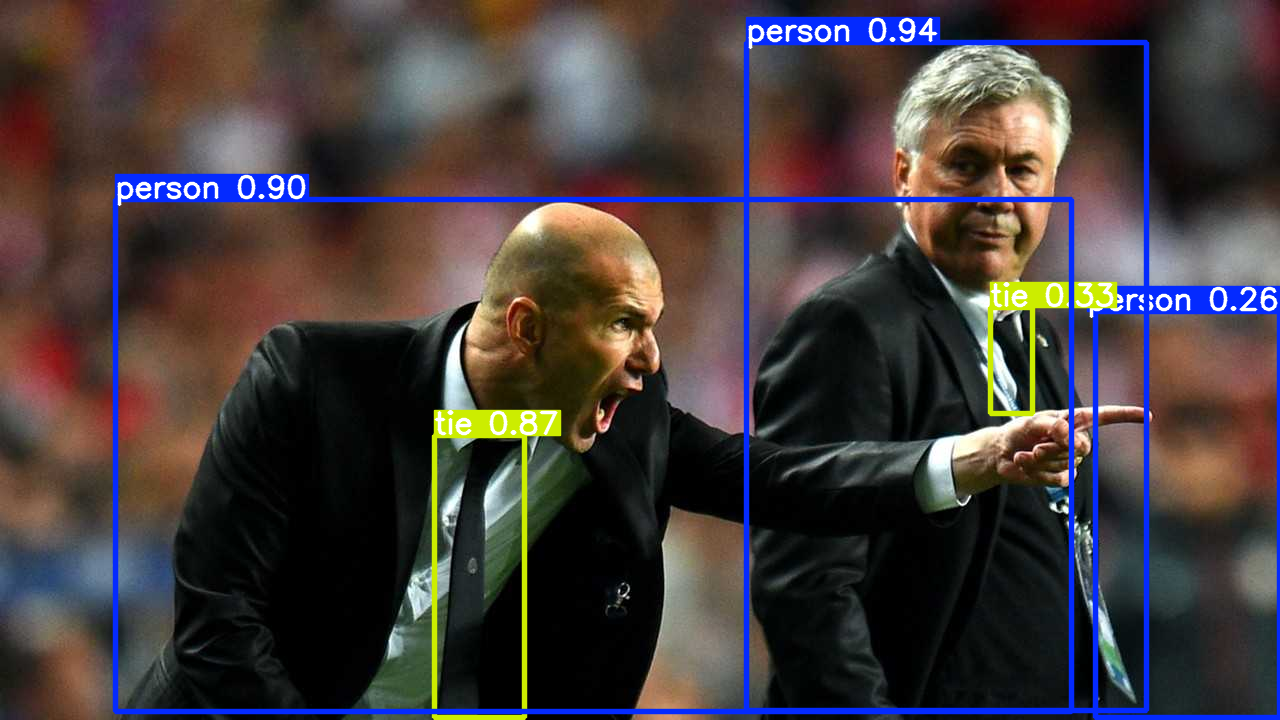

In [8]:
import torch
from matplotlib import pyplot as plt
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

img = 'https://ultralytics.com/images/zidane.jpg'  # or your own image
results = model(img)
results.print()         # prints detected classes + confidence
results.show()          # shows image with boxes


In [4]:
%cd yolov5

[WinError 2] The system cannot find the file specified: 'yolov5'
C:\Users\piyus\Videos\Captures\Smart_Traffic_Control\yolov5


In [ ]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data IDK20K_Vehicles-1/data.yaml \
  --weights yolov5x.pt \
  --name yolov5x_idd_finetune


In [5]:
import urllib.request

url = 'https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x.pt'
urllib.request.urlretrieve(url, 'yolov5x.pt')


('yolov5x.pt', <http.client.HTTPMessage at 0x2459b5e3a80>)